In [1]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [85]:
ds_new=xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup_SOM_v02/atm/hist/*.cam.h1.*.nc').load()
ds_new['time']=ds_new.time.values-datetime.timedelta(days=15)

Exception ignored in: <function CachingFileManager.__del__ at 0x2ba582f7a050>
Traceback (most recent call last):
  File "/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/xarray/backends/file_manager.py", line 224, in __del__
    def __del__(self):
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
ds_old=xr.open_mfdataset('/glade/campaign/univ/uwas0044/czarakas/StomatalSlopeExperiments2021/archive/spinup_coupled/coupled_DEFmedslope_1xCO2_02_old/tseries/'+
                         'coupled_DEFmedslope_1xCO2_02.cam.h0.TS.000101-004012.nc')
ds_old_trefht=xr.open_mfdataset('/glade/campaign/univ/uwas0044/czarakas/StomatalSlopeExperiments2021/archive/spinup_coupled/coupled_DEFmedslope_1xCO2_02_old/tseries/'+
                         'coupled_DEFmedslope_1xCO2_02.cam.h0.TREFHT.000101-004012.nc')
ds_old['time']=ds_old.time.values-datetime.timedelta(days=15)
ds_old_trefht['time']=ds_old_trefht.time.values-datetime.timedelta(days=15)

In [ ]:
weights = (ds_new.gw/ds_new.gw.mean(dim='lat')).mean(dim='time')

In [ ]:
plt.plot((ds_new.TS*weights).mean(dim=['lat','lon'])-273.15,label='new')
plt.plot((ds_old.TS*weights).mean(dim=['lat','lon'])[0:12*30]-273.15,label='old')
plt.legend()
plt.grid()

In [6]:
ds = xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup_SOM_CESM2.1_v02/atm/hist/'+'*.h1.*.nc')
ds['time']=ds.time.values-datetime.timedelta(days=15)

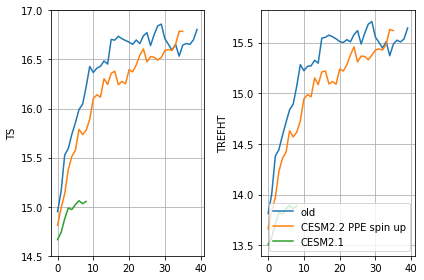

In [7]:
plt.subplot(1,2,1)
plt.plot((ds_old.TS*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,label='old')
plt.plot((ds_new.TS*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,label='CESM2.2 PPE spin up')
plt.plot((ds.TS*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,label='CESM2.1')
plt.grid()
plt.ylabel('TS')
plt.ylim([14.5, 17])
plt.subplot(1,2,2)
plt.plot((ds_old_trefht.TREFHT*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,label='old')
plt.plot((ds_new.TREFHT*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,label='CESM2.2 PPE spin up')
plt.plot((ds.TREFHT*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,label='CESM2.1')
plt.legend()
plt.grid()
plt.ylabel('TREFHT')
plt.tight_layout()

# Check what is up

In [91]:
ds2 = xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup_SOM_v02/atm/hist/*.cam.h1.0041*.nc')
ds2['time']=ds2.time.values-datetime.timedelta(days=15)

In [92]:
ds3 = xr.open_mfdataset('/glade/scratch/czarakas/COUP0000_1850_SOM_test04/run/*.cam.h1.*.nc').load()
ds3['time']=ds3.time.values-datetime.timedelta(days=15)

In [40]:
weights = (ds2.gw/ds2.gw.mean(dim='lat')).mean(dim='time')

In [133]:
ds2_lnd = xr.open_mfdataset('/glade/scratch/czarakas/archive/COUP0000_1850spinup_SOM_v02/lnd/hist/*.clm2.h3.0041*.nc')
ds2_lnd['time']=ds2_lnd.time.values-datetime.timedelta(days=15)

ds3_lnd = xr.open_mfdataset('/glade/scratch/czarakas/COUP0000_1850_SOM_test04/run/*.clm2.h3.*.nc')
ds3_lnd['time']=ds3_lnd.time.values-datetime.timedelta(days=15)

In [145]:
ds2 = xr.open_mfdataset('/glade/scratch/czarakas/COUP0000_1850spinup_SOM_v02/run/*.cam.h1.*.nc')
ds2['time']=ds2.time.values-datetime.timedelta(days=15)

In [146]:
ds2['RESTOM']=ds2.FSNT-ds2.FLNT

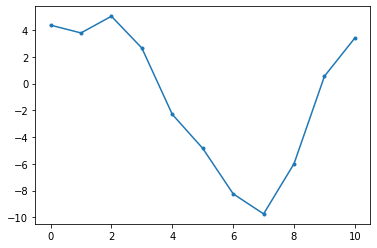

In [148]:
plt.plot((ds2.RESTOM*weights).mean(dim=['lat','lon']),'.-')

In [144]:
print((ds2.RESTOM*weights).mean(dim=['lat','lon','time']).values,'.-')

15.64059837952334 .-


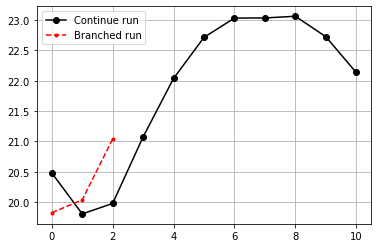

In [142]:
plt.plot((ds2.TSMX*weights).mean(dim=['lat','lon'])[0:35]-273.15,'o-k', label='Continue run')
plt.plot((ds3.TSMX*weights).mean(dim=['lat','lon'])[1:]-273.15,'.--r', label='Branched run')
plt.legend()

plt.grid()

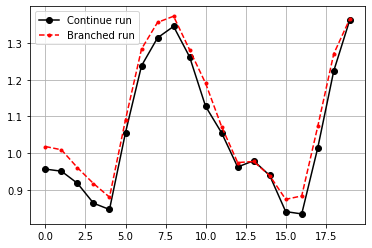

In [113]:
plt.plot((ds2_lnd.TLAI*weights).mean(dim=['lat','lon'])[0:20],'o-k', label='Continue run')
plt.plot((ds3_lnd.TLAI*weights).mean(dim=['lat','lon'])[0:20],'.--r', label='Branched run')
plt.legend()

plt.grid()

In [40]:
ds007 = xr.open_mfdataset('/glade/scratch/czarakas/COUP0007_1850_SOM_v04/run/*.cam.h1.*.nc').load()
ds007['time']=ds007.time.values-datetime.timedelta(days=15)

ds007_v03 = xr.open_mfdataset('/glade/scratch/czarakas/COUP0007_1850_SOM_v03/run/*.cam.h1.*.nc').load()
ds007_v03['time']=ds007_v03.time.values-datetime.timedelta(days=15)

Text(0.5, 1.0, 'Amazon')

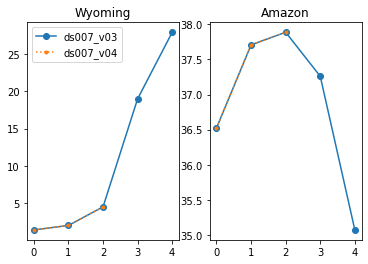

In [42]:
datasets = [ds007, ds007_v03]
ilat=70
ilon=100
plt.subplot(1,2,1)
plt.plot(ds007_v03.TSMX[0:5,ilat,ilon]-273.15,'o-',label='ds007_v03')
plt.plot(ds007.TSMX[0:5,ilat,ilon]-273.15,'.:',label='ds007_v04')
plt.legend()
plt.title('Wyoming')
plt.subplot(1,2,2)
ilat=45
ilon=120
plt.plot(ds007_v03.TSMX[0:5,ilat,ilon]-273.15,'o-',label='ds007_v03')
plt.plot(ds007.TSMX[0:5,ilat,ilon]-273.15,'.:',label='ds007_v04')
plt.title('Amazon')

In [37]:
ds007_v03.TSMX[0:2,ilat,ilon]-ds007.TSMX[0:2,ilat,ilon]

<xarray.DataArray 'TSMX' (time: 2)>
array([0., 0.], dtype=float32)
Coordinates:
    lat      float64 -4.737
    lon      float64 300.0
  * time     (time) object 0040-12-17 00:00:00 0041-01-17 00:00:00

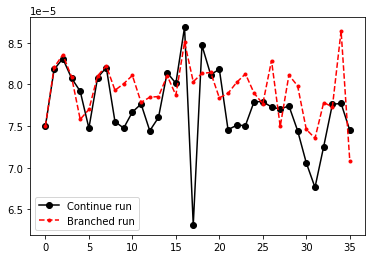

In [136]:
plt.plot(ds2_lnd.GPP[:36,50,120],'o-k', label='Continue run')
plt.plot(ds3_lnd.GPP[:36,50,120],'.--r', label='Branched run')
plt.legend()

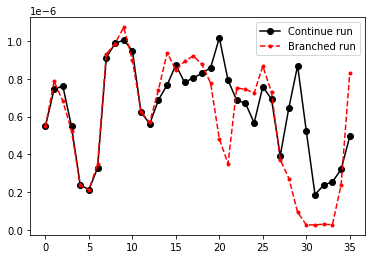

In [137]:
plt.plot(ds2_lnd.GPP[:36,80,80],'o-k', label='Continue run')
plt.plot(ds3_lnd.GPP[:36,80,80],'.--r', label='Branched run')
plt.legend()

In [78]:
ds=xr.open_dataset('/glade/scratch/czarakas/COUP0000_1850_SOM_test04/run/COUP0000_1850_SOM_test04.cam.h2.0041-01-02-00000.nc')

In [106]:
ds3_lnd

<xarray.Dataset>
Dimensions:             (levgrnd: 25, levsoi: 20, levlak: 10, levdcmp: 25, time: 123, hist_interval: 2, lon: 144, lat: 96)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levsoi              (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.95 6.94 8.03
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.33 44.78
  * levdcmp             (levdcmp) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * time                (time) object 0031-01-17 00:00:00 ... 0041-03-17 00:0...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables: (12/60)
    mcdate              (time) int32 dask.array<chunksize=(120,), meta=np.ndarray>
    mcsec               (time) int32 dask.array<chunksize=(120,), meta=np.ndarray>
    mdcur               (time) int32 dask.array<chunksize=(120,), meta=np.ndarray>
    mscur               (time) int32 dask.array<chunksize=(120,), meta=np.ndarray>
    nstep               (time) int32 dask.array<chunksize=(120,), meta=np.ndarray>
    time_bounds         (time, hist_interval) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    ...                  ...
    TSA                 (time, lat, lon) float32 dask.array<chunksize=(120, 96, 144), meta=np.ndarray>
    TSAI                (time, lat, lon) float32 dask.array<chunksize=(120, 96, 144), meta=np.ndarray>
    TSKIN               (time, lat, lon) float32 dask.array<chunksize=(120, 96, 144), meta=np.ndarray>
    TV                  (time, lat, lon) float32 dask.array<chunksize=(120, 96, 144), meta=np.ndarray>
    TWS                 (time, lat, lon) float32 dask.array<chunksize=(120, 96, 144), meta=np.ndarray>
    WIND                (time, lat, lon) float32 dask.array<chunksize=(120, 96, 144), meta=np.ndarray>
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 03/07/22 10:39:15
    source:                                    Community Terrestrial Systems ...
    hostname:                                  cheyenne
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          month_1
    Time_constant_3Dvars_filename:             ./COUP0000_1850spinup_SOM_v02....
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

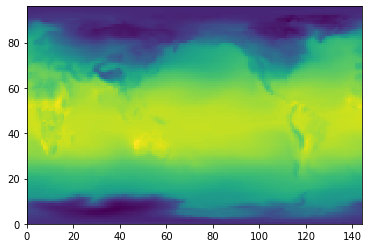

In [75]:
plt.pcolormesh(ds.TREFHT[0,:,:])

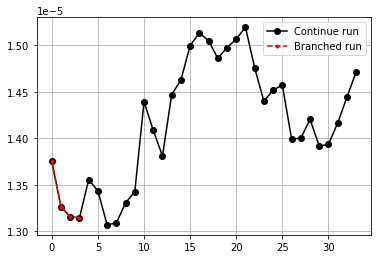

In [42]:
plt.plot((ds2_lnd.GPP*weights).mean(dim=['lat','lon'])[1:35],'o-k', label='Continue run')
plt.plot((ds3_lnd.GPP*weights).mean(dim=['lat','lon'])[0:35],'.--r', label='Branched run')
plt.legend()

plt.grid()

In [33]:
ds2_lnd['time'][0:3]

<xarray.DataArray 'time' (time: 3)>
array([cftime.DatetimeNoLeap(40, 12, 17, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(40, 12, 18, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(40, 12, 19, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0040-12-17 00:00:00 ... 0040-12-19 00:00:00

In [34]:
ds3_lnd['time'][0:3]

<xarray.DataArray 'time' (time: 3)>
array([cftime.DatetimeNoLeap(40, 12, 18, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(40, 12, 19, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(40, 12, 20, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0040-12-18 00:00:00 ... 0040-12-20 00:00:00

In [30]:
ds2_lnd

<xarray.Dataset>
Dimensions:         (levgrnd: 25, levsoi: 20, levlak: 10, levdcmp: 25, time: 1412, hist_interval: 2, lon: 144, lat: 96, nvegwcs: 4)
Coordinates:
  * levgrnd         (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * levsoi          (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.06 5.95 6.94 8.03
  * levlak          (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp         (levdcmp) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * time            (time) object 0040-12-17 00:00:00 ... 0044-10-29 00:00:00
  * lon             (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat             (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval, nvegwcs
Data variables: (12/58)
    mcdate          (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    mcsec           (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    mdcur           (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    mscur           (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    nstep           (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    time_bounds     (time, hist_interval) object dask.array<chunksize=(365, 2), meta=np.ndarray>
    ...              ...
    VPD2M           (time, lat, lon) float32 dask.array<chunksize=(365, 96, 144), meta=np.ndarray>
    VPD_CAN         (time, lat, lon) float32 dask.array<chunksize=(365, 96, 144), meta=np.ndarray>
    WBT             (time, lat, lon) float32 dask.array<chunksize=(365, 96, 144), meta=np.ndarray>
    WBT_R           (time, lat, lon) float32 dask.array<chunksize=(365, 96, 144), meta=np.ndarray>
    WBT_U           (time, lat, lon) float32 dask.array<chunksize=(365, 96, 144), meta=np.ndarray>
    WIND            (time, lat, lon) float32 dask.array<chunksize=(365, 96, 144), meta=np.ndarray>
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 03/08/22 12:40:26
    source:                                    Community Terrestrial Systems ...
    hostname:                                  cheyenne
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          day_1
    Time_constant_3Dvars_filename:             ./COUP0000_1850spinup_SOM_v02....
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

(15.25, 16.0)

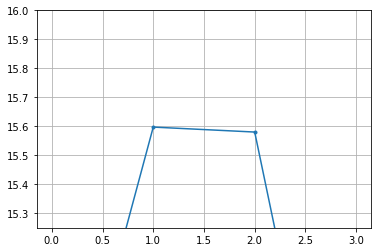

In [14]:
plt.plot((ds2.TREFHT*weights).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,'.-')
plt.grid()
plt.ylim([15.25,16])

# Scraps

# Compare with CESM2.1 equilibrium temperature

In [45]:
mother_case = xr.open_mfdataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001/atm/proc/tseries/month_1/*TS*.nc')
mother_case_trefht = xr.open_mfdataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001/atm/proc/tseries/month_1/*TREFHT*.nc')
weight_factor2 = mother_case.gw / mother_case.gw.mean(dim='lat')
weight_factor2=weight_factor2.mean(dim='time')
mother_case['time']=mother_case.time.values-datetime.timedelta(days=15)
mother_case_trefht['time']=mother_case_trefht.time.values-datetime.timedelta(days=15)

In [4]:
cesm21_fsnt = xr.open_mfdataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001/atm/proc/tseries/month_1/*.FSNT.*.nc')
cesm21_flnt = xr.open_mfdataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001/atm/proc/tseries/month_1/*.FLNT.*.nc')

In [24]:
TS = xr.open_mfdataset('/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.B1850.f19_g17.CMIP6-piControl-2deg.001/atm/proc/tseries/month_1/*.TS.*.nc').TS
TS['time']=TS.time.values-datetime.timedelta(days=15)

In [27]:
global_TS=(TS*weight_factor21).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')

In [31]:
a=global_TS.values
dTS=[t - s for s, t in zip(a, a[1:])]

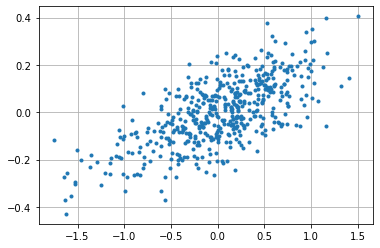

In [35]:
plt.plot((RESTOM*weight_factor21).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')[0:-1],
         dTS,
         '.')
plt.grid()

In [12]:
weight_factor21 = (cesm21_fsnt.gw / cesm21_fsnt.gw.mean(dim='lat'))[1,:]

In [13]:
RESTOM=cesm21_fsnt.FSNT-cesm21_flnt.FLNT

In [18]:
RESTOM['time']=RESTOM.time.values-datetime.timedelta(days=15)

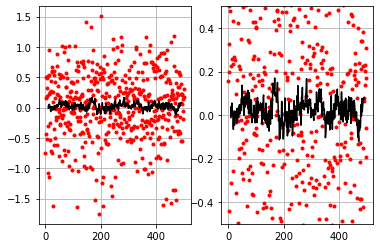

In [37]:
plt.subplot(1,2,1)
plt.plot((RESTOM*weight_factor21).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'),'.r',
         label='Base case (CESM2.1)')
plt.plot((RESTOM*weight_factor21).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time').rolling(year=20,center=True).mean(),'-k',
         label='Base case (CESM2.1)')
plt.grid()
plt.subplot(1,2,2)
plt.plot((RESTOM*weight_factor21).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'),'.r',
         label='Base case (CESM2.1)')
plt.plot((RESTOM*weight_factor21).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time').rolling(year=20,center=True).mean(),'-k',
         label='Base case (CESM2.1)')
plt.ylim([-0.5, 0.5])
plt.grid()

TS
15.166518814133099
TREFHT
13.999887135744586


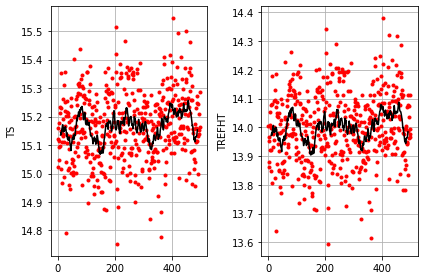

In [21]:
plt.subplot(1,2,1)
plt.plot((mother_case.TS*weight_factor2).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,'.r',
         label='Base case (CESM2.1)')
plt.plot((mother_case.TS*weight_factor2).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time').rolling(year=20,center=True).mean()-273.15,'-k',
         label='Base case (CESM2.1)')
plt.ylabel('TS')
plt.grid()
plt.subplot(1,2,2)
plt.plot((mother_case_trefht.TREFHT*weight_factor2).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time')-273.15,'.r',
         label='Base case (CESM2.1)')
plt.plot((mother_case_trefht.TREFHT*weight_factor2).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time').rolling(year=20,center=True).mean()-273.15,'-k',
         label='Base case (CESM2.1)')
plt.ylabel('TREFHT')
plt.grid()
plt.tight_layout()
print('TS')
print(np.nanmean((mother_case.TS*weight_factor2).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'))-273.15)
print('TREFHT')
print(np.nanmean((mother_case_trefht.TREFHT*weight_factor2).mean(dim=['lat','lon']).groupby('time.year').mean(dim='time'))-273.15)

# Compare finidats

In [24]:
finidat_2005=xr.open_dataset('/glade/p/cgd/tss/people/oleson/CLM5_restarts/clm51_PPEn02ctsm51d021_2deg_GSWP3V1_leafbiomassesai_PPE3_hist.clm2.r.2005-01-01-00000.nc')
finidat_PPE=xr.open_dataset('/glade/p/cgd/tss/people/oleson/CLM5_restarts/clm51_PPEn02ctsm51d021_2deg_GSWP3V1_leafbiomassesai_PPE3_1850pAD.clm2.r.2041-01-01-00000.nc')

In [34]:
finidat_PPE_old=xr.open_dataset('/glade/p/cgd/tss/people/oleson/CLM5_restarts/clm51_lmbirchwkattgen01ctsm51d006_2deg_GSWP3V1_nocrop_PPE_1850pAD.clm2.r.1441-01-01-00000.nc')
#finidat_PPE.leafc

/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'timemgr_rst_nstep_rad_prev' has multiple fill values {-9999, -999999999}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'timemgr_rst_type' has multiple fill values {-9999, -999999999}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'timemgr_rst_step_sec' has multiple fill values {-9999, -999999999}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'timemgr_rst_start_ymd' has multiple fill values {-9999, -999999999}, decoding all values to NaN.
  decode_timedelta=dec

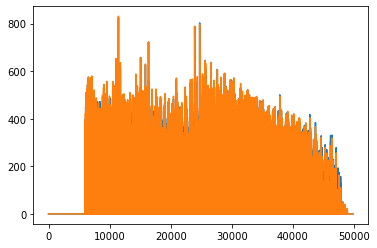

In [36]:
plt.plot(finidat_PPE_old.leafc)
plt.plot(finidat_PPE.leafc)#.TLAI

In [ ]:
finidat_PPE_old=xr.open_dataset('//glade/scratch/czarakas/test_medslope_005/run/finidat_interp_dest.nc')

(0.0, 2.0)

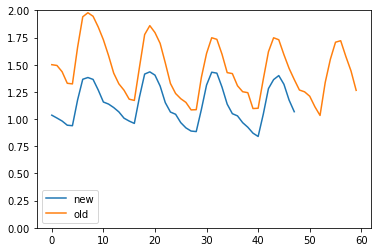

In [10]:
plt.plot((ds_new_lnd.TLAI*weights_lnd).mean(dim=['lat','lon']),label='new')
plt.plot((ds_old_LAI.TLAI*weights_lnd).mean(dim=['lat','lon'])[0:5*12], label='old')
plt.legend()
plt.ylim([0,2])

In [42]:
plt.pcolormesh(ds_new_lnd.TLAI[5,:,:], vmin=0, vmax=5)
plt.colorbar()

IndexError: Index 5 is out of bounds for axis 0 with size 5